In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
import os
import pandas as pd
from scipy.optimize import curve_fit
from lpu3dnet.post_process.kr_process import *

def clean_df(df):

    krw_max = df['krw'].iloc[-1]
    if krw_max < 0.2:
        return False
    return True
    

root_dir = 'db'
ct_idx = 3
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)




In [3]:
def plot_sample(sample_idx):

    num_pred = len(sim_results[sample_idx]['generate'])
    num_compare = len(sim_results['compare'])

    prediction = [] 
    compare = []
    for i in range(num_pred):
        df_pred = convert_dict_to_pd(sim_results[sample_idx]['generate'][i])
        exp_fit = Exponential_fit(df_pred)
        kr_avg_pred = exp_fit.generate_kr_data()
        if clean_df(kr_avg_pred):
            prediction.append(kr_avg_pred)
        


    for i in range(num_compare):
        df_compare = convert_dict_to_pd(sim_results['compare'][i])
        exp_fit = Exponential_fit(df_compare)
        kr_avg_compare = exp_fit.generate_kr_data()
        if clean_df(kr_avg_compare):
            compare.append(kr_avg_compare)

    df_real = sim_results[sample_idx]['original']
    # fit the real data
    df_real = convert_dict_to_pd(df_real)
    exp_fit = Exponential_fit(df_real)
    kr_real = exp_fit.generate_kr_data()

    num_samples = min(len(prediction), len(compare))
    f = plt.figure(figsize=(6, 4))
    for i in range(num_samples):
        plt.plot(prediction[i]['sw'], prediction[i]['krw'], 'r-',linewidth=2,alpha=0.4)
        plt.plot(compare[i]['sw'], compare[i]['krw'], 'y*',linewidth=1,alpha=0.4)
        plt.title('Exponential Fit to Relative Permeability')
        plt.xlabel('Water Saturation (Sw)')
    plt.plot(kr_real['sw'], kr_real['krw'], color='blue',linewidth=5, label='Actual Data')
    plt.plot(df_real['sw'], df_real['kr_water'], color='blue', label='Actual Data')
    plt.show()

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

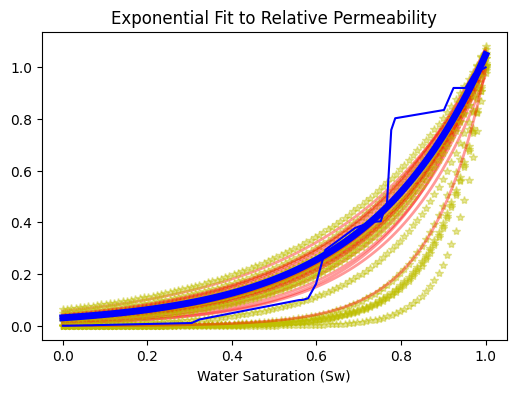

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

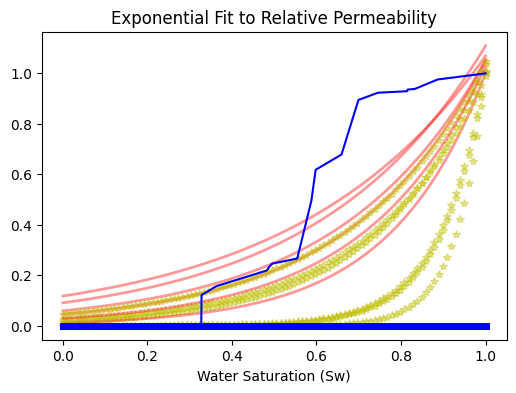

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

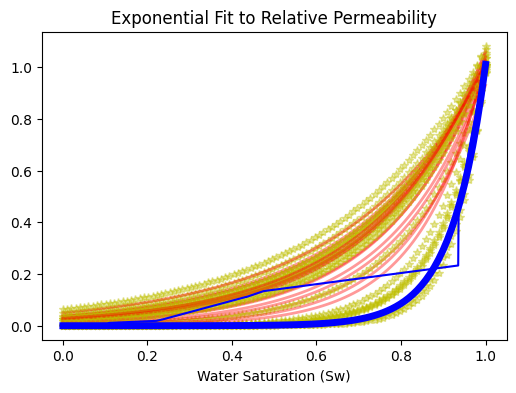

/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/pyt

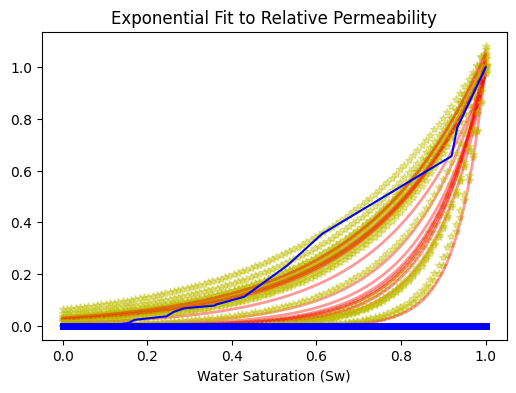

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

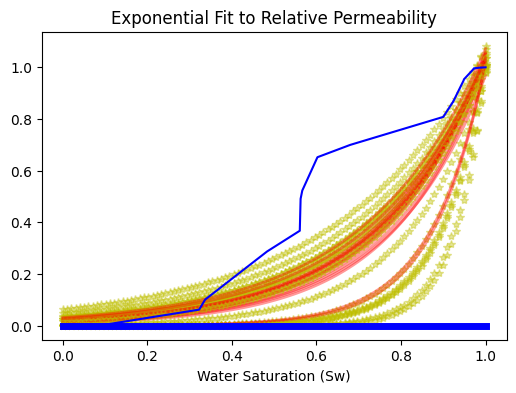

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

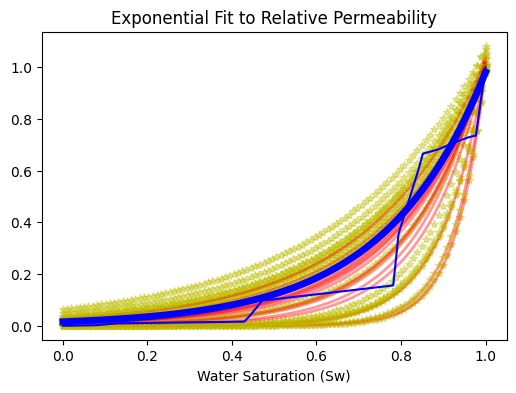

In [5]:
root_dir = 'db'
ct_idx = 3
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

for sample_idx in range(7):
    try:
        plot_sample(sample_idx)
    except:
        continue

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

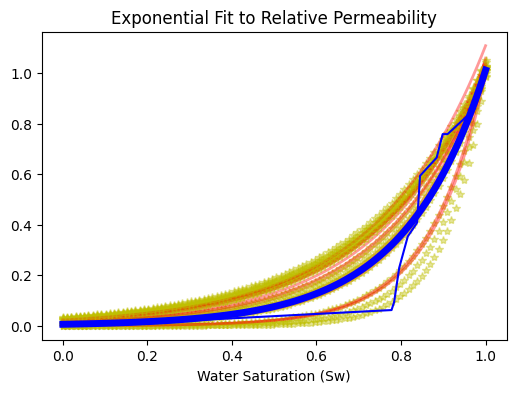

/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

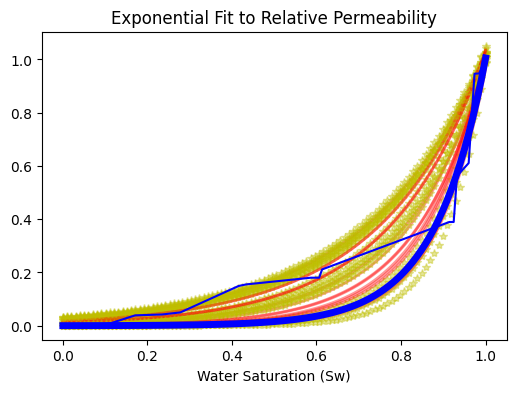

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

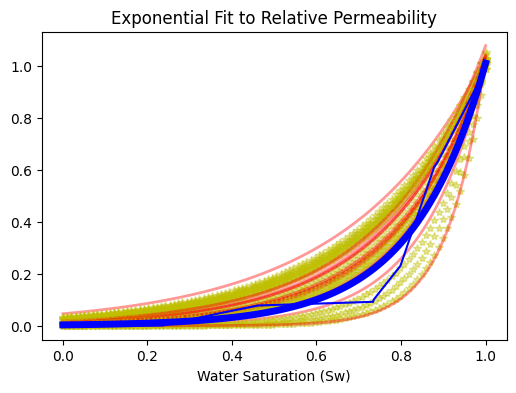

/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

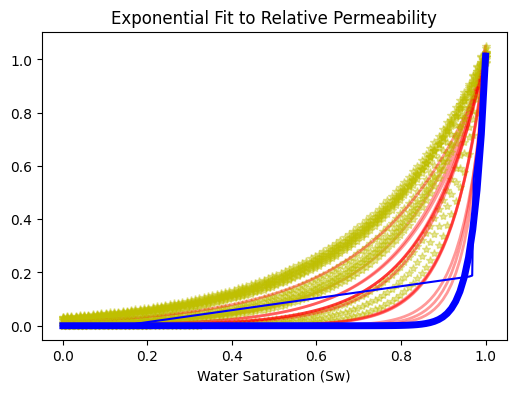

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

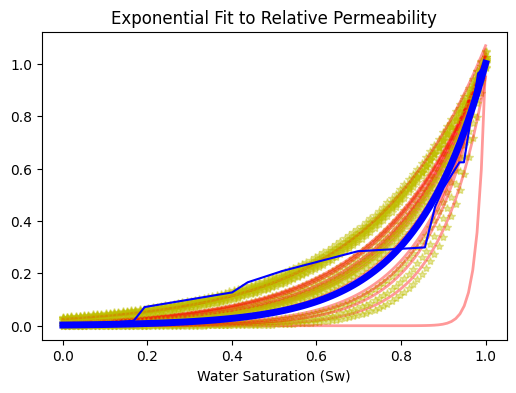

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

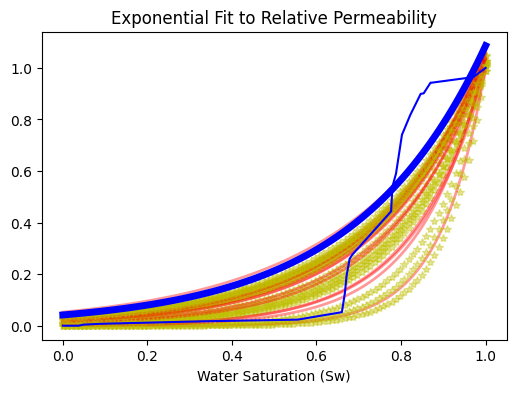

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

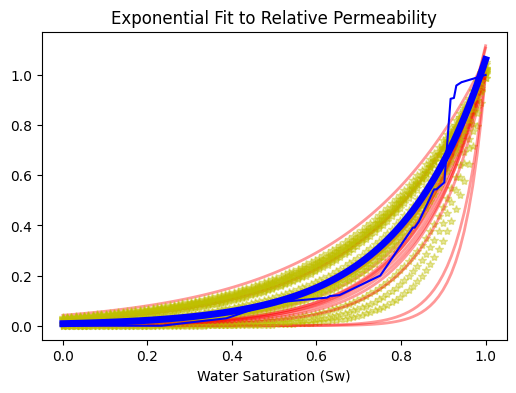

In [6]:
root_dir = 'db'
ct_idx = 1
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

for sample_idx in range(7):
    try:
        plot_sample(sample_idx)
    except:
        continue

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

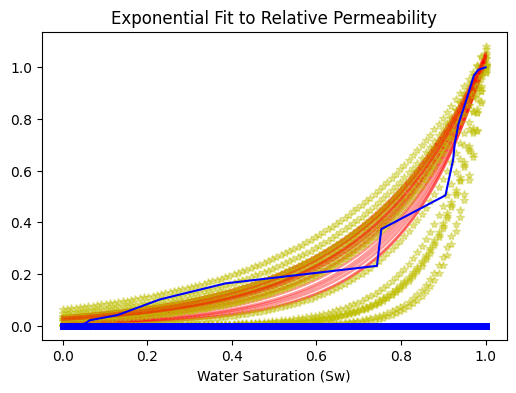

In [2]:
sample_idx = 7
# df_all_compare = aggregate_kr(sim_results['compare'])
num_pred = len(sim_results[sample_idx]['generate'])
num_compare = len(sim_results['compare'])

prediction = [] 
compare = []
for i in range(num_pred):
    df_pred = convert_dict_to_pd(sim_results[sample_idx]['generate'][i])
    exp_fit = Exponential_fit(df_pred)
    kr_avg_pred = exp_fit.generate_kr_data()
    if clean_df(kr_avg_pred):
        prediction.append(kr_avg_pred)
    


for i in range(num_compare):
    df_compare = convert_dict_to_pd(sim_results['compare'][i])
    exp_fit = Exponential_fit(df_compare)
    kr_avg_compare = exp_fit.generate_kr_data()
    if clean_df(kr_avg_compare):
        compare.append(kr_avg_compare)

df_real = sim_results[sample_idx]['original']
# fit the real data
df_real = convert_dict_to_pd(df_real)
exp_fit = Exponential_fit(df_real)
kr_real = exp_fit.generate_kr_data()


#%%
num_samples = min(len(prediction), len(compare))
f = plt.figure(figsize=(6, 4))
for i in range(num_samples):
    plt.plot(prediction[i]['sw'], prediction[i]['krw'], 'r-',linewidth=2,alpha=0.4)
    plt.plot(compare[i]['sw'], compare[i]['krw'], 'y*',linewidth=1,alpha=0.4)
    plt.title('Exponential Fit to Relative Permeability')
    plt.xlabel('Water Saturation (Sw)')
plt.plot(kr_real['sw'], kr_real['krw'], color='blue',linewidth=5, label='Actual Data')
plt.plot(df_real['sw'], df_real['kr_water'], color='blue', label='Actual Data')
plt.show()